## Datasets

In [1]:
import os
import torch
from torchvision.datasets import MNIST, FashionMNIST
from torch.utils.data import DataLoader, random_split
from torchvision import transforms

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
'cuda' if torch.cuda.is_available() else 'cpu'

'cpu'

In [3]:
train_ds = MNIST('', train=True, download=True, transform=transforms.ToTensor())
test_ds = MNIST('', train=False, download=True, transform=transforms.ToTensor())
print(train_ds.data.shape, test_ds.data.shape)

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])


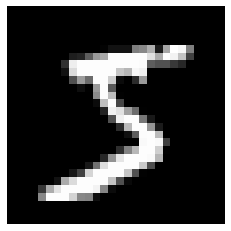

In [5]:
import matplotlib.pyplot as plt


X = train_ds.data[0]
plt.imshow(X.reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()

In [6]:
training_data = FashionMNIST(
    root='',
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

testing_data = FashionMNIST(
    root='',
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting FashionMNIST\raw\train-images-idx3-ubyte.gz to FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting FashionMNIST\raw\train-labels-idx1-ubyte.gz to FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting FashionMNIST\raw\t10k-images-idx3-ubyte.gz to FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to FashionMNIST\raw



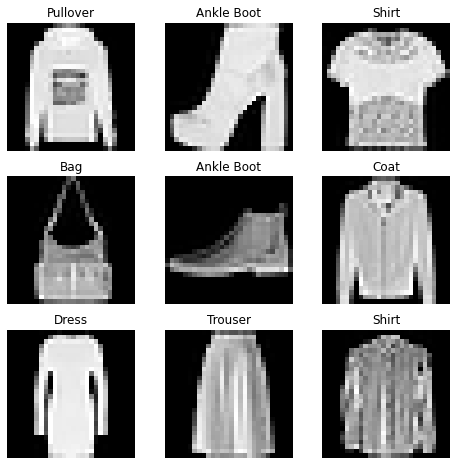

In [7]:
labels_map = {
    0: "T-shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

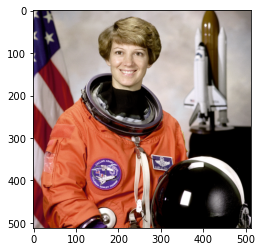

In [9]:
import skimage


orig_img = skimage.data.astronaut()
skimage.io.imsave('images_test/astronaut.jpg', orig_img)
plt.imshow(orig_img)

In [10]:
from PIL import Image

orig_img = Image.open('images_test/astronaut.jpg')

In [11]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as T


def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        imgs = [imgs]
        num_rows = len(imgs)
        num_cols = len(imgs[0]) + with_orig
        fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
        for row_idx, row in enumerate(imgs):
            row = [orig_img] + row if with_orig else row
            for col_idx, img in enumerate(row):
                ax = axs[row_idx, col_idx]
                ax.imshow(np.asarray(img), **imshow_kwargs)
                ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

        if with_orig:
            axs[0, 0].set(title='Original image')
            axs[0, 0].title.set_size(8)
        if row_title is not None:
            for row_idx in range(num_rows):
                axs[row_idx, 0].set(ylabel=row_title[row_idx])

        plt.tight_layout()

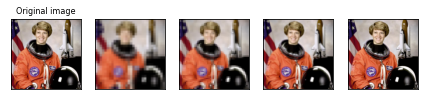

In [12]:
from ctypes import resize


resized_image = [T.Resize(size=size)(orig_img) for size in (30, 50, 100, orig_img.size)]
plot(resized_image)

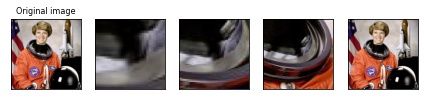

In [13]:
center_crops = [T.CenterCrop(size=size)(orig_img) for size in (30, 50, 100, orig_img.size)]
plot(center_crops)

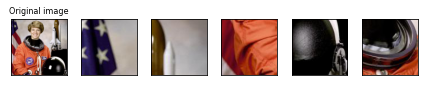

In [15]:
(top_left, top_right, bottom_left, bottom_right, center) = T.FiveCrop(size=(100, 100))(orig_img)
plot([top_left, top_right, bottom_left, bottom_right, center])

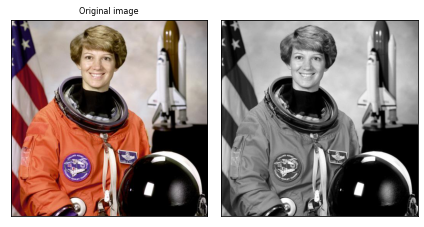

In [16]:
gray_img = T.Grayscale()(orig_img)
plot([gray_img], cmap='gray')

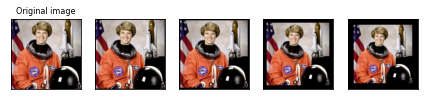

In [17]:
padded_imgs = [T.Pad(padding=padding)(orig_img) for padding in (3, 10, 30, 50)]
plot(padded_imgs)

## TensorBoard

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [4]:
from random import shuffle


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))
])

trainset = torchvision.datasets.FashionMNIST(
    '.',
    download=True,
    train=True,
    transform=transform
)

testset = torchvision.datasets.FashionMNIST(
    '.',
    download=True,
    train=False,
    transform=transform
)

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=4,
    shuffle=True,
    num_workers=2
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=4,
    shuffle=True,
    num_workers=2
)

In [5]:
from torch.utils.tensorboard import SummaryWriter


writer = SummaryWriter('run/fashion_mnist_experiment_1')

In [6]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
img_grid = torchvision.utils.make_grid(images)
writer.add_image('four_fashion_mnist_images', img_grid)

In [7]:
!tensorboard --logdir=runs

^C
